# Problem Definition 

The Global Power Plant Database offers a vast repository of power plant data from around the world. The challenge lies in utilizing this data effectively to predict two key aspects: the primary fuel used in electricity generation and the electrical generating capacity (in megawatts) of the power plants. Predicting these variables accurately can provide valuable insights for energy planning, policy-making, and investment decisions

# Data Loading

In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load dataset
data_url = "https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv?raw=true"
power_plants = pd.read_csv(data_url)


In [33]:
# Display first few rows of the dataset
print("First few rows of the dataset:")
print(power_plants.head())

First few rows of the dataset:
  country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN    

# Data PreProcessing

In [5]:
# Summary statistics of numerical variables
print("\nSummary statistics of numerical variables:")
print(power_plants.describe())


Summary statistics of numerical variables:
       capacity_mw    latitude   longitude  other_fuel3  commissioning_year  \
count   907.000000  861.000000  861.000000          0.0          527.000000   
mean    326.223755   21.197918   77.464907          NaN         1997.091082   
std     590.085456    6.239612    4.939316          NaN           17.082868   
min       0.000000    8.168900   68.644700          NaN         1927.000000   
25%      16.725000   16.773900   74.256200          NaN         1988.000000   
50%      59.200000   21.780000   76.719500          NaN         2001.000000   
75%     385.250000   25.512400   79.440800          NaN         2012.000000   
max    4760.000000   34.649000   95.408000          NaN         2018.000000   

       wepp_id  year_of_capacity_data  generation_gwh_2013  \
count      0.0                  519.0                  0.0   
mean       NaN                 2019.0                  NaN   
std        NaN                    0.0                  NaN

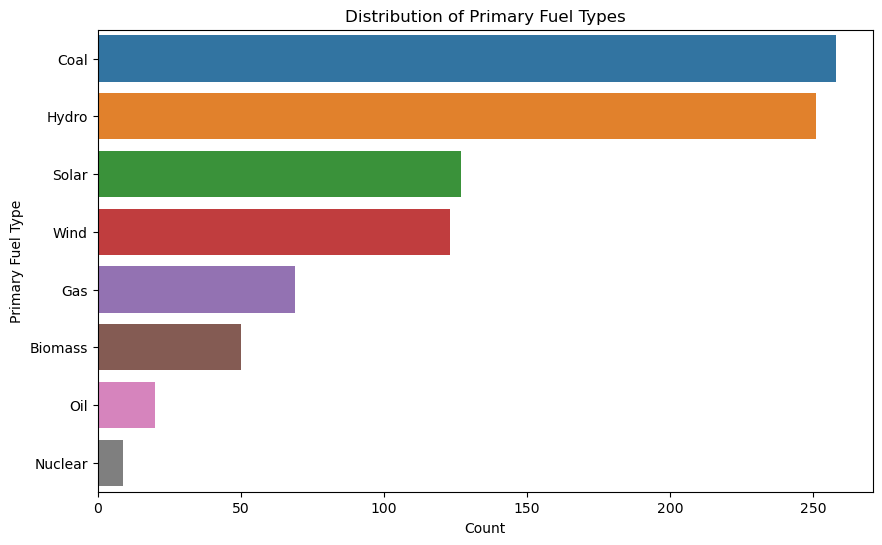

In [8]:
# Distribution of primary fuel types
plt.figure(figsize=(10, 6))
sns.countplot(y='primary_fuel', data=power_plants, order=power_plants['primary_fuel'].value_counts().index)
plt.title('Distribution of Primary Fuel Types')
plt.xlabel('Count')
plt.ylabel('Primary Fuel Type')
plt.show()


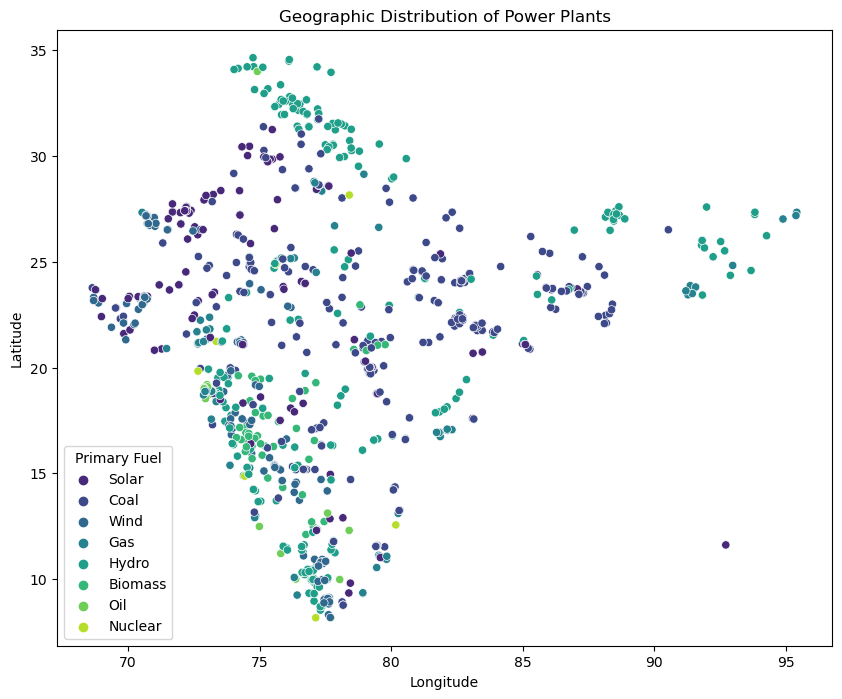

In [9]:
# Geographic distribution of power plants
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=power_plants, hue='primary_fuel', palette='viridis')
plt.title('Geographic Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Primary Fuel')
plt.show()


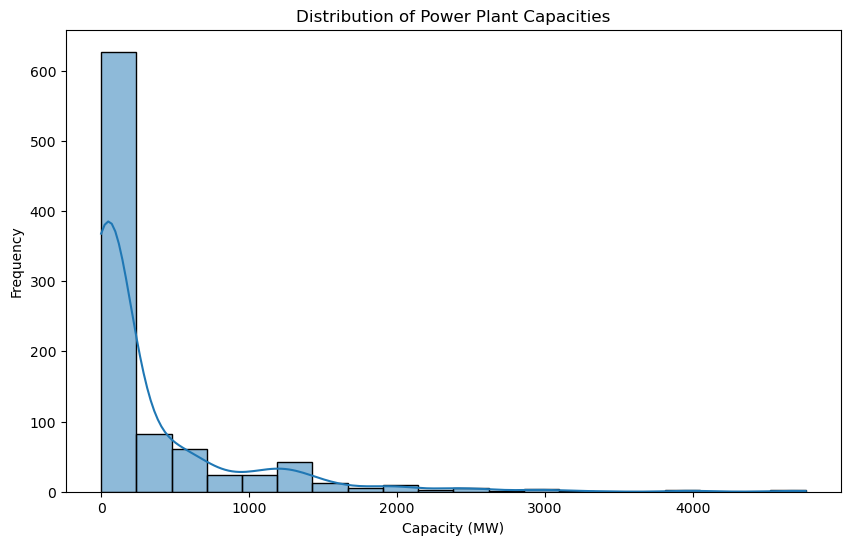

In [10]:
# Distribution of capacity
plt.figure(figsize=(10, 6))
sns.histplot(power_plants['capacity_mw'], kde=True, bins=20)
plt.title('Distribution of Power Plant Capacities')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.show()


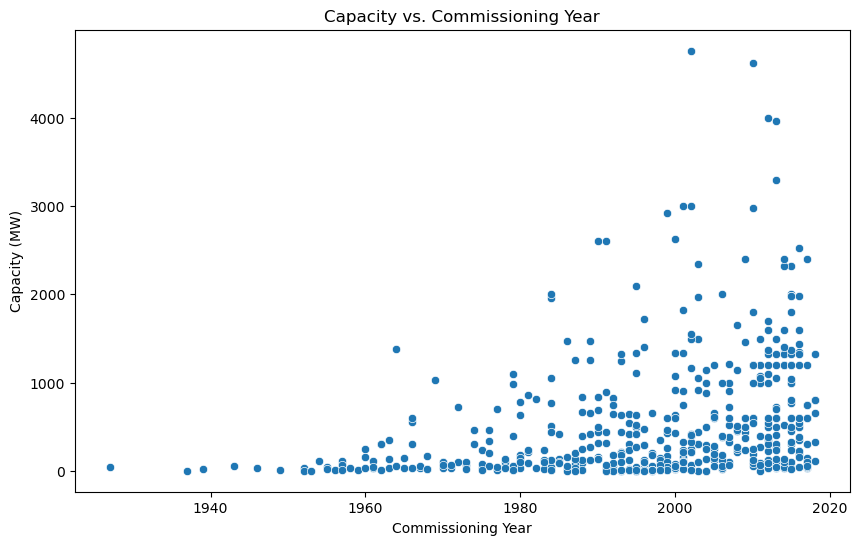

In [11]:
# Capacity vs. Commissioning Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='commissioning_year', y='capacity_mw', data=power_plants)
plt.title('Capacity vs. Commissioning Year')
plt.xlabel('Commissioning Year')
plt.ylabel('Capacity (MW)')
plt.show()


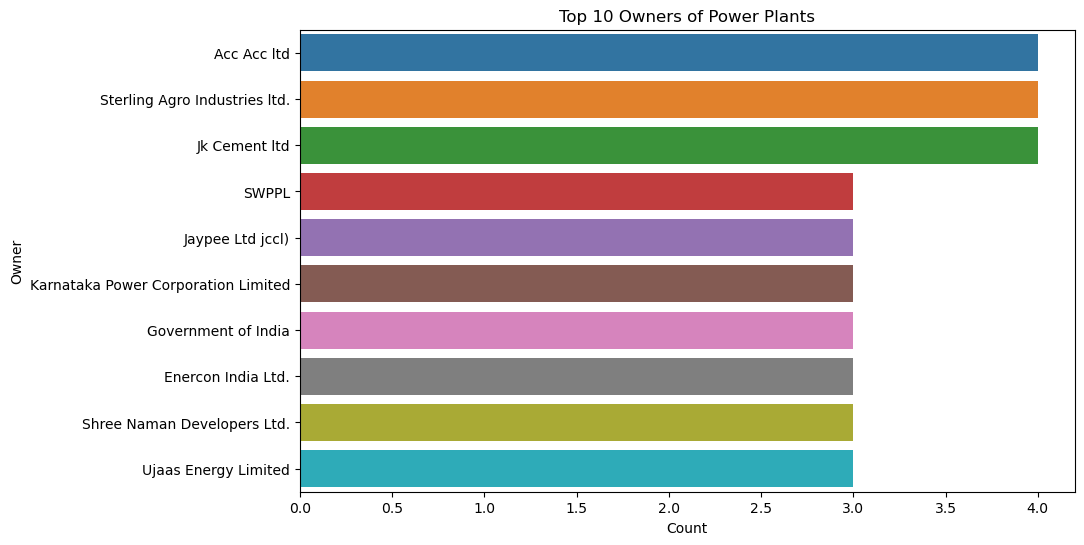

In [12]:
# Distribution of ownership
plt.figure(figsize=(10, 6))
sns.countplot(y='owner', data=power_plants, order=power_plants['owner'].value_counts().index[:10])
plt.title('Top 10 Owners of Power Plants')
plt.xlabel('Count')
plt.ylabel('Owner')
plt.show()


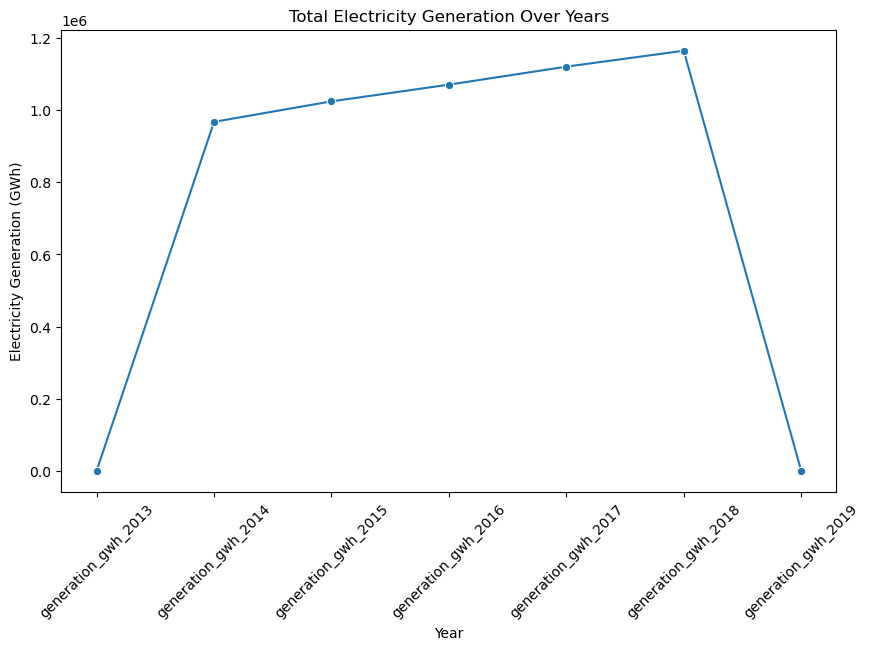

In [14]:
# Generation trends over years
generation_years = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']
generation_data = power_plants[generation_years].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=generation_data.index, y=generation_data.values, marker='o')
plt.title('Total Electricity Generation Over Years')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (GWh)')
plt.xticks(rotation=45)
plt.show()

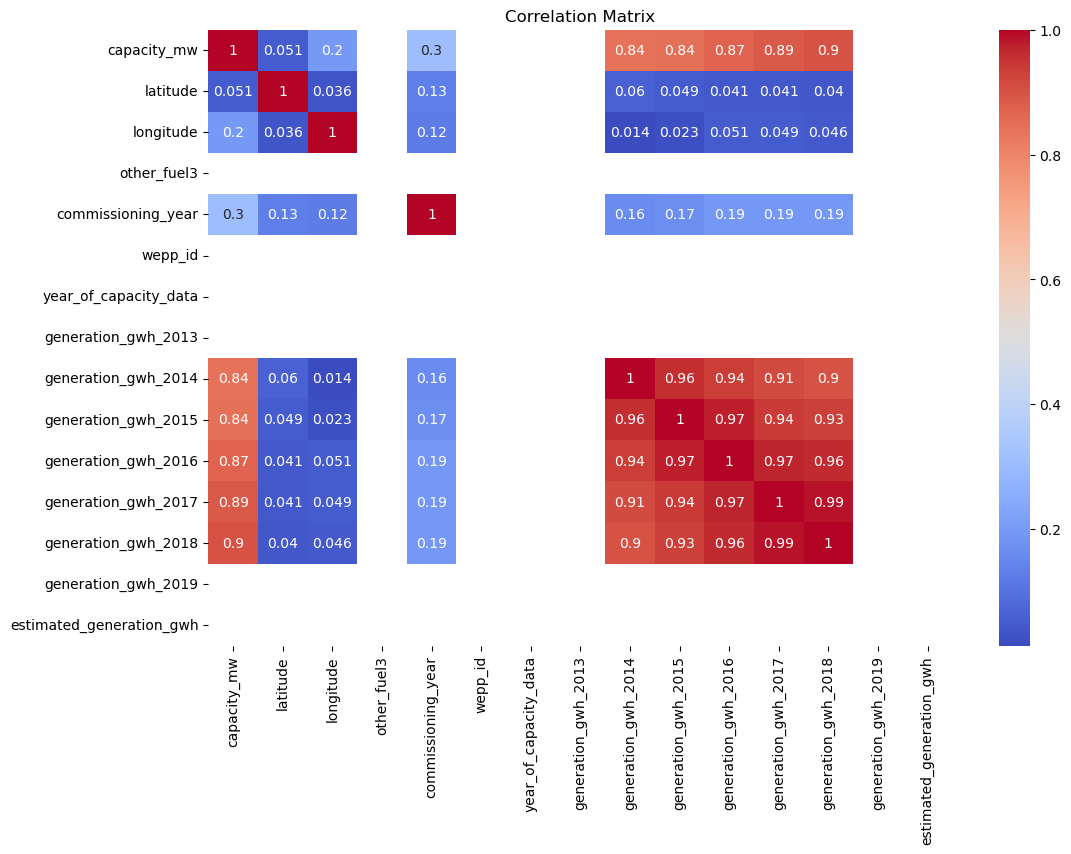

In [15]:
# Correlation matrix
correlation_matrix = power_plants.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

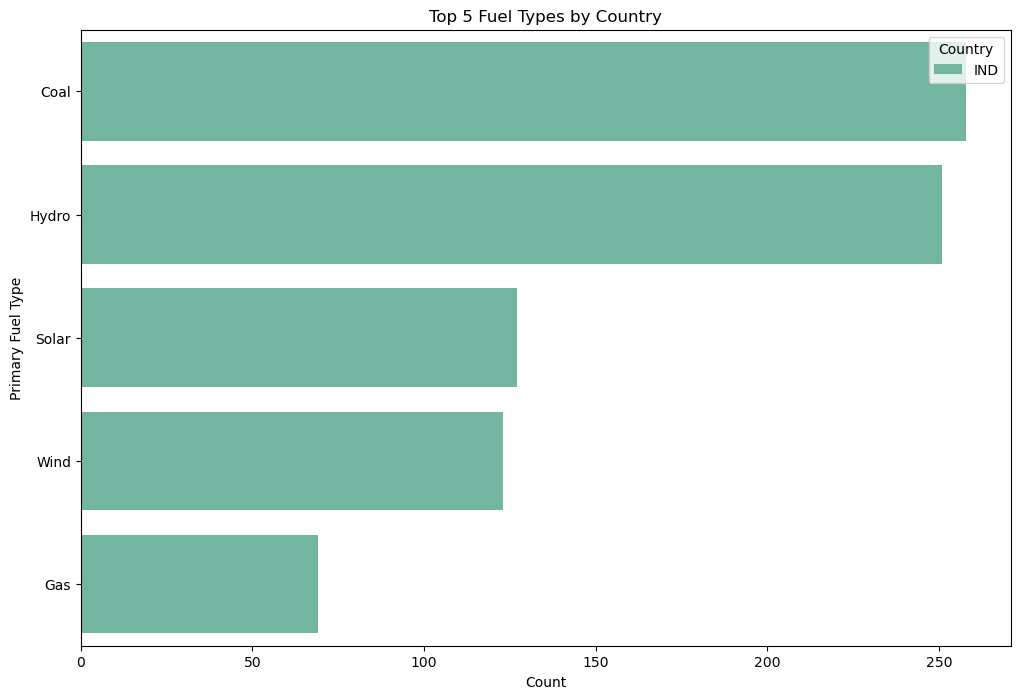

In [16]:
# Fuel type distribution by country
plt.figure(figsize=(12, 8))
sns.countplot(y='primary_fuel', hue='country', data=power_plants, order=power_plants['primary_fuel'].value_counts().index[:5], palette='Set2')
plt.title('Top 5 Fuel Types by Country')
plt.xlabel('Count')
plt.ylabel('Primary Fuel Type')
plt.legend(title='Country', loc='upper right')
plt.show()

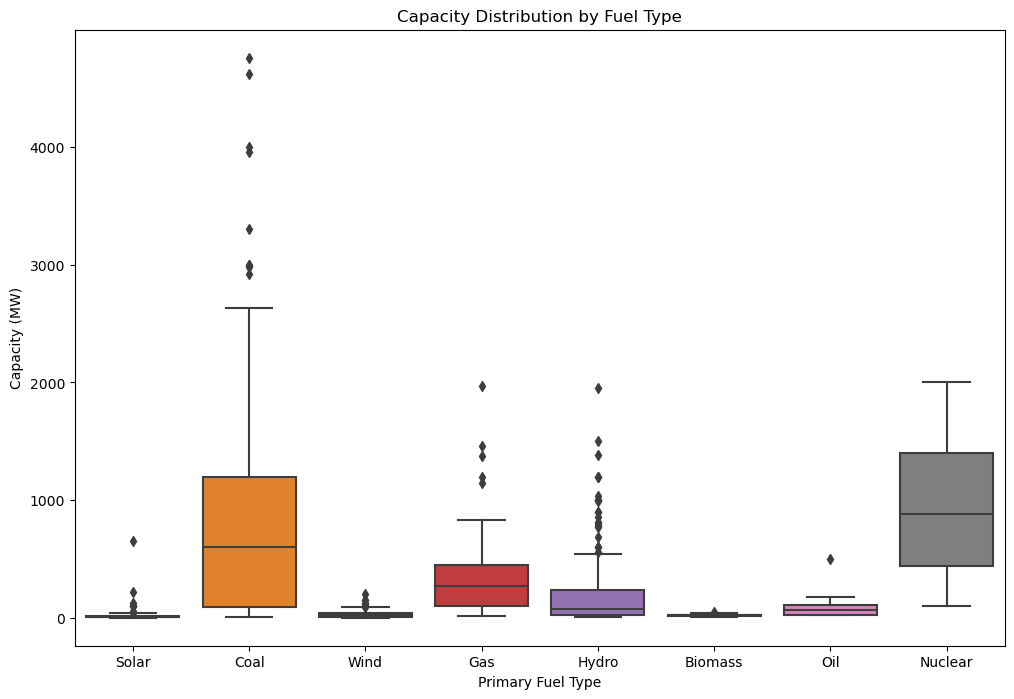

In [17]:
# Capacity distribution by fuel type
plt.figure(figsize=(12, 8))
sns.boxplot(x='primary_fuel', y='capacity_mw', data=power_plants)
plt.title('Capacity Distribution by Fuel Type')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Capacity (MW)')
plt.show()

In [34]:
# Analysis of missing values
missing_values = power_plants.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


In [35]:
# Handling missing values (filling missing capacity with mean, dropping other missing values for simplicity)
power_plants['capacity_mw'].fillna(power_plants['capacity_mw'].mean(), inplace=True)
#power_plants.dropna(subset=['primary_fuel'], inplace=True)


In [36]:
missing_values = power_plants.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


In [42]:
# Check missing values
missing_values = power_plants.isnull().sum()
print("Missing Values:")
print(missing_values)

# Fill missing values for numerical features with mean
numerical_features = ['latitude', 'longitude', 'commissioning_year']
for feature in numerical_features:
    power_plants[feature].fillna(power_plants[feature].mean(), inplace=True)

# Fill missing values for categorical features with mode
categorical_features = ['other_fuel1', 'other_fuel2', 'other_fuel3', 'geolocation_source', 'year_of_capacity_data', 'generation_data_source']
for feature in categorical_features:
    mode_value = power_plants[feature].mode().iloc[0] if not power_plants[feature].isnull().all() else None
    if mode_value is not None:
        power_plants[feature].fillna(mode_value, inplace=True)

# Check if missing values have been filled
missing_values_after_fill = power_plants.isnull().sum()
print("\nMissing Values after Filling:")
print(missing_values_after_fill)

Missing Values:
country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year            0
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Missing Values after Filling:
country                       0
country_long                  0
name        

In [38]:
# Split dataset into features and target variables for classification (fuel type) and regression (capacity)
X_classification = power_plants.drop(columns=['primary_fuel', 'capacity_mw'])
y_classification = power_plants['primary_fuel']
X_regression = power_plants.drop(columns=['primary_fuel'])
y_regression = power_plants['capacity_mw']

KeyError: "['primary_fuel'] not found in axis"

In [39]:
import pandas as pd

# Load dataset
data_url = "https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv?raw=true"
power_plants = pd.read_csv(data_url)

# Check missing values
missing_values = power_plants.isnull().sum()
print("Missing Values:")
print(missing_values)

# Fill missing values for numerical features with mean
numerical_features = ['latitude', 'longitude', 'commissioning_year']
for feature in numerical_features:
    power_plants[feature].fillna(power_plants[feature].mean(), inplace=True)

# Alternatively, you can use specific values for categorical features
# For example, fill missing values in 'owner' with 'Unknown'
power_plants['owner'].fillna('Unknown', inplace=True)

# Check if missing values have been filled
missing_values_after_fill = power_plants.isnull().sum()
print("\nMissing Values after Filling:")
print(missing_values_after_fill)


Missing Values:
country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Missing Values after Filling:
country                       0
country_long                  0
name        

In [40]:
import pandas as pd

# Load dataset
data_url = "https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv?raw=true"
power_plants = pd.read_csv(data_url)

# Check missing values
missing_values = power_plants.isnull().sum()
print("Missing Values:")
print(missing_values)

# Fill missing values for numerical features with mean
numerical_features = ['latitude', 'longitude', 'commissioning_year']
for feature in numerical_features:
    power_plants[feature].fillna(power_plants[feature].mean(), inplace=True)

# Fill missing values for categorical features with mode
categorical_features = ['other_fuel1', 'other_fuel2', 'other_fuel3', 'geolocation_source', 'year_of_capacity_data', 'generation_data_source']
for feature in categorical_features:
    power_plants[feature].fillna(power_plants[feature].mode()[0], inplace=True)

# Check if missing values have been filled
missing_values_after_fill = power_plants.isnull().sum()
print("\nMissing Values after Filling:")
print(missing_values_after_fill)


Missing Values:
country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


KeyError: 0

In [47]:
# Fill missing values for numerical features with mean
numerical_features = ['latitude', 'longitude', 'commissioning_year']
for feature in numerical_features:
    power_plants[feature].fillna(power_plants[feature].mean(), inplace=True)

# Fill missing values for categorical features with mode
categorical_features = ['owner', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh']
for feature in categorical_features:
    mode_value = power_plants[feature].mode().iloc[0] if not power_plants[feature].isnull().all() else None
    if mode_value is not None:
        power_plants[feature].fillna(mode_value, inplace=True)

# Check if missing values have been filled
missing_values_after_fill = power_plants.isnull().sum()
print("\nMissing Values after Filling:")
print(missing_values_after_fill)


Missing Values after Filling:
country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
primary_fuel_Biomass          0
primary_fuel_Coal             0
primary_fuel_Gas              0
primary_fuel_Hydro            0
primary_f

In [50]:
# Fill missing values for numerical features with mean
numerical_features = ['latitude', 'longitude', 'commissioning_year']
for feature in numerical_features:
    power_plants[feature].fillna(power_plants[feature].mean(), inplace=True)

# Fill missing values for remaining columns with mode
remaining_features = ['owner', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh', 'other_fuel3']
for feature in remaining_features:
    mode_value = power_plants[feature].mode().iloc[0] if not power_plants[feature].isnull().all() else None
    if mode_value is not None:
        power_plants[feature].fillna(mode_value, inplace=True)

# Check if missing values have been filled
missing_values_after_fill = power_plants.isnull().sum()
print("\nMissing Values after Filling:")
print(missing_values_after_fill)


Missing Values after Filling:
country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
primary_fuel_Biomass          0
primary_fuel_Coal             0
primary_fuel_Gas              0
primary_fuel_Hydro            0
primary_f

In [54]:
# Perform one-hot encoding for remaining categorical columns
categorical_features = ['other_fuel1', 'other_fuel2', 'other_fuel3', 'geolocation_source', 'source', 'generation_data_source']
power_plants = pd.get_dummies(power_plants, columns=categorical_features)

# Drop columns not needed for regression
power_plants.drop(columns=['primary_fuel', 'capacity_mw'], inplace=True)

# Split dataset into features and target variables for regression
X_regression = power_plants.drop(columns=['capacity_mw'])
y_regression = power_plants['capacity_mw']

# Split data into train and test sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

KeyError: "None of [Index(['other_fuel1', 'other_fuel2', 'other_fuel3', 'geolocation_source',\n       'source', 'generation_data_source'],\n      dtype='object')] are in the [columns]"